In [ ]:
from fastai.text.all import *

In [ ]:
dls = TextDataLoaders.from_csv("./datasets/", "train.csv", text_col="text", label_col="experience")
dls.show_batch(max_n=1)

In [ ]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

In [ ]:
learn.fit(10)
learn.fine_tune(10, 1e-3)

In [6]:
from fastai.text.all import load_learner
learn1 = load_learner("./models/trained.pkl")

{0: 32, 1: 1, 2: 24}


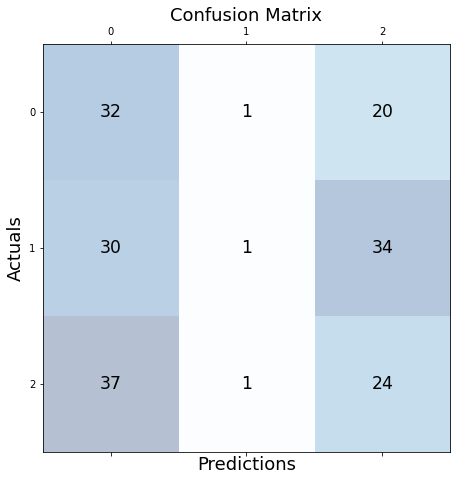

In [7]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

test_data = pd.read_csv("./datasets/test.csv")

actuals1 = []
predictions1 = []

for review, exp in zip(test_data["text"], test_data["experience"]):
    actuals1.append(exp)
    predictions1.append(learn1.predict(review)[0])

# Calculate the confusion matrix
#
predictions1 = [int(x) for x in predictions1]
conf_matrix = confusion_matrix(y_true=actuals1, y_pred=predictions1)

# dict_ = {"ACTUALS1": actuals1, "PREDICTIONS1": predictions1}

# pd.DataFrame.to_csv(pd.DataFrame(dict_), "./results.csv", index=False)

count = {0: 0, 1:0, 2: 0}
for i, j in zip(actuals1, predictions1):
  if i == j:
    count[i] += 1

print(count)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()